# Machine Learning - Problem Solving

# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

# 2. Import Library

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# import data
data = pd.read_csv('https://raw.githubusercontent.com/danupurnomo/hacktiv8-exercises/main/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing/Players%20-%20Fifa%202022%20-%20Simplified.csv')

data_ori = data.copy()
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [3]:
# Rename column

data.rename(columns={'ValueEUR' : 'Price', 'Overall' : 'Rating'}, inplace=True)
data.head()

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


In [4]:
# Check Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [5]:
# Check Dataset

data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

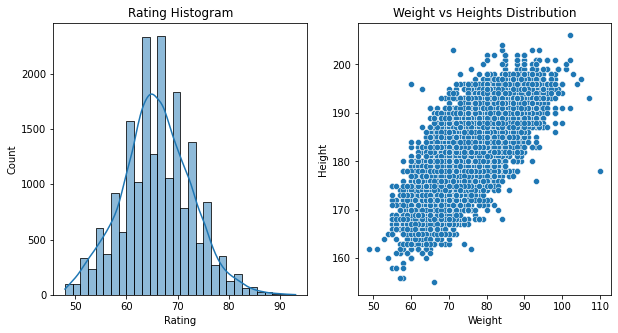

In [6]:
# Histogram

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) #baris, kolom, gambar ke-
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Rating Histogram')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight', y='Height', data=data)
plt.title('Weight vs Heights Distribution')

plt.show()

Setelah dilakukan pembuatan histogram, pada gambar 1 terlihat distribusi data pada kolom rating adalah distribusi data normal yang mana antara Rating 60-70 terdapat nilai yang besar diantara rating yang lain. Pada gambar 2, distribusi data antara Weight (berat) dan Height (tinggi).

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [7]:
# Get data for model inference

data_inf = data.sample(10, random_state=17) #pengambilan random, tpi setiap running bakal sama
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [8]:
# Remove Inference-set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [9]:
# reset index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [10]:
# display data_inf
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


## Split Dataset

In [11]:
# Define 'X' dan 'y'

X = data_train_test.drop(['Rating'], axis=1) # kolom rating dihapus dan axis=1 artinya menunjukkan kolom. Features = alat/kolom untuk membuat prediksi
y = data_train_test['Rating'] # target = sesuatu yang akan diprediksi
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [12]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17) #test_size = data test diambil dari beberapa data train, misal data test diambil 20% dari data train

print(X_train.shape)
print(X_test.shape)

(15400, 13)
(3850, 13)


In [13]:
X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,Quintana,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,R. Manaj,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,E. Vergani,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,Talles Magno,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,Lee Bum Young,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Ricardo Ferreira,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,Bruno Jordão,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,Lino Essier,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


In [14]:
X_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
13192,T. Mokwa,28,182,83,425000,Medium,Medium,68,46,55,62,58,63
13931,D. Drysdale,21,196,76,925000,Medium,Medium,69,27,46,49,61,72
16360,J. Laws,23,183,76,475000,Medium,Medium,65,34,51,53,57,65
16251,K. Boma,18,187,73,550000,Low,Medium,50,31,43,44,61,58
5172,W. Foderingham,30,185,75,1100000,Medium,Medium,68,69,72,71,43,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,M. Bălașa,26,186,78,1500000,Medium,High,68,51,56,52,68,75
16973,C. Ciucureanu,21,186,75,425000,Medium,Medium,66,50,51,60,31,58
6668,N. Körber,24,187,83,1500000,Medium,Medium,70,64,59,74,35,67
12161,J. Matt,31,194,92,500000,High,High,55,63,51,59,26,82


## Feature Selection

Personal judgement : tidak ada hubungan antara `Name` dengan `Rating` sebagai contoh `Joko Ronaldo` tidak ada hubungannya dengan `Cristian Ronaldo`. Oleh karena itu, fitur `Name` akan dihapus.

In [15]:
# Drop Column 'Name'

X_train.drop(['Name'], axis=1, inplace=True)
X_test.drop(['Name'], axis=1, inplace=True)

X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


## Handling Outlier

Ini akan diajarkan di phase 1 week 1 day 2

## Handling Missing Values

In [16]:
X_train.isna().sum()

Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

tidak ada missing value pada X_train

In [17]:
y_train.isna().sum()

0

In [18]:
X_test.isna().sum()

Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [19]:
y_test.isna().sum()

0

## Splitting Columns (Numerical Columns and Categorical Columns)

In [20]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numeric Columns : ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns : ['AttackingWorkRate', 'DefensiveWorkRate']


In [21]:
# split on X_train

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [22]:
X_test_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
13192,28,182,83,425000,68,46,55,62,58,63
13931,21,196,76,925000,69,27,46,49,61,72
16360,23,183,76,475000,65,34,51,53,57,65
16251,18,187,73,550000,50,31,43,44,61,58
5172,30,185,75,1100000,68,69,72,71,43,70
...,...,...,...,...,...,...,...,...,...,...
5771,26,186,78,1500000,68,51,56,52,68,75
16973,21,186,75,425000,66,50,51,60,31,58
6668,24,187,83,1500000,70,64,59,74,35,67
12161,31,194,92,500000,55,63,51,59,26,82


In [23]:
X_test_cat

,AttackingWorkRate,DefensiveWorkRate
13192,Medium,Medium
13931,Medium,Medium
16360,Medium,Medium
16251,Low,Medium
5172,Medium,Medium
...,...,...
5771,Medium,High
16973,Medium,Medium
6668,Medium,Medium
12161,High,High


In [24]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler # MinMaxScaler gunanya untuk mengkonversi nilai scalar default range 0-1

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num) # fit / train = mempelajari data
X_test_num_scaled = scaler.transform(X_test_num) # mengubah nilai 0-1

In [25]:
X_train_num_scaled

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

In [26]:
# feature encoding

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [27]:
X_train_cat_encoded # pengurutannya sesuai abjad

array([[2., 0.],
       [2., 2.],
       [0., 2.],
       ...,
       [2., 2.],
       [2., 2.],
       [1., 2.]])

## Concatenate between Numerical Columns and Categorical Columns

In [28]:
# Concate data

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)

X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [29]:
# Versi DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])

# melihat hasil prepocessing
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,2.0,0.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,2.0,2.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,0.0,2.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,0.0,2.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,1.0,2.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,0.0,1.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,2.0,2.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,2.0,2.0


# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



In [30]:
# Model Definition

from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [31]:
# Train

model_linear_regression.fit(X_train_final, y_train)

LinearRegression()

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [42]:
## predict error on train-set and test_set
y_predict_train = model_linear_regression.predict(X_train_final)
y_predict_test = model_linear_regression.predict(X_test_final)

## Evaluation of Errors
from sklearn.metrics import mean_squared_error, r2_score

print('Error Train-set :', mean_squared_error(y_train, y_predict_train))
print('Error Test-set :', mean_squared_error(y_test, y_predict_test))
print('R2 Score Train-set :', r2_score(y_train, y_predict_train))
print('R2 Score Test-set :', r2_score(y_test, y_predict_test))


Error Train-set : 8.917780461896871
Error Test-set : 8.757108979655305
R2 Score Train-set : 0.8079996713102542
R2 Score Test-set : 0.8122805829937406


In [33]:
# Display Rules

print('Intercept :', model_linear_regression.intercept_)
print('Coefficient :', model_linear_regression.coef_)

Intercept : 36.198928005412014
Coefficient : [ 7.66111977  2.52233197  1.419032   38.92962425  2.811425    2.60425313
  2.42803119 20.45000636  7.73316122 11.71164183 -0.16229389 -0.15990455]


In [34]:
X_train_final_df.columns

MultiIndex([(              'Age',),
            (           'Height',),
            (           'Weight',),
            (            'Price',),
            (        'PaceTotal',),
            (    'ShootingTotal',),
            (     'PassingTotal',),
            (   'DribblingTotal',),
            (   'DefendingTotal',),
            ( 'PhysicalityTotal',),
            ('AttackingWorkRate',),
            ('DefensiveWorkRate',)],
           )

# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [35]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [36]:
# split numerical and categorical columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [37]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat) 

In [38]:
# Concatenation

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[4.21052632e-01, 4.90196078e-01, 3.62068966e-01, 3.47938144e-03,
        6.52173913e-01, 5.92105263e-01, 5.88235294e-01, 6.21212121e-01,
        4.41558442e-01, 6.19047619e-01, 0.00000000e+00, 1.00000000e+00],
       [2.89473684e-01, 3.92156863e-01, 4.48275862e-01, 7.73195876e-03,
        6.23188406e-01, 3.42105263e-01, 4.85294118e-01, 5.30303030e-01,
        6.49350649e-01, 7.46031746e-01, 2.00000000e+00, 2.00000000e+00],
       [1.05263158e-01, 4.50980392e-01, 2.75862069e-01, 4.89690722e-02,
        8.26086957e-01, 6.31578947e-01, 5.88235294e-01, 8.03030303e-01,
        3.76623377e-01, 5.55555556e-01, 0.00000000e+00, 1.00000000e+00],
       [5.52631579e-01, 5.68627451e-01, 5.51724138e-01, 5.67010309e-04,
        5.65217391e-01, 5.92105263e-01, 6.17647059e-01, 6.36363636e-01,
        4.28571429e-01, 6.34920635e-01, 2.00000000e+00, 2.00000000e+00],
       [2.63157895e-02, 6.47058824e-01, 5.00000000e-01, 5.67010309e-03,
        4.92753623e-01, 6.05263158e-01, 5.44117647e-01, 5.60

In [39]:
# Versi DataFrame

data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_columns])

data_inf_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.421053,0.490196,0.362069,0.003479,0.652174,0.592105,0.588235,0.621212,0.441558,0.619048,0.0,1.0
1,0.289474,0.392157,0.448276,0.007732,0.623188,0.342105,0.485294,0.530303,0.649351,0.746032,2.0,2.0
2,0.105263,0.450980,0.275862,0.048969,0.826087,0.631579,0.588235,0.803030,0.376623,0.555556,0.0,1.0
3,0.552632,0.568627,0.551724,0.000567,0.565217,0.592105,0.617647,0.636364,0.428571,0.634921,2.0,2.0
4,0.026316,0.647059,0.500000,0.005670,0.492754,0.605263,0.544118,0.560606,0.246753,0.571429,2.0,2.0
5,0.131579,0.450980,0.500000,0.021649,0.681159,0.513158,0.617647,0.712121,0.688312,0.666667,2.0,0.0
6,0.236842,0.294118,0.310345,0.003222,0.652174,0.565789,0.441176,0.606061,0.324675,0.301587,0.0,2.0
7,0.210526,0.411765,0.344828,0.003995,0.492754,0.605263,0.352941,0.606061,0.337662,0.444444,2.0,2.0
8,0.078947,0.529412,0.327586,0.004639,0.608696,0.236842,0.382353,0.500000,0.597403,0.460317,2.0,2.0
9,0.315789,0.411765,0.379310,0.008247,0.695652,0.592105,0.558824,0.712121,0.350649,0.555556,2.0,2.0


In [40]:
# Predict model inference

y_predict_inf = model_linear_regression.predict(data_inf_final)
y_predict_inf = pd.DataFrame(y_predict_inf, columns=['Ratings - Prediction'])
y_predict_inf

,Ratings - Prediction
0,69.322716
1,68.123269
2,71.517242
3,70.422103
4,62.666168
5,72.016785
6,61.816243
7,62.879710
8,61.632516
9,68.507348


In [41]:
# Concate to original inference-set

pd.concat([data_inf, y_predict_inf], axis=1)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Ratings - Prediction
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.322716
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.123269
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.517242
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.422103
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.666168
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,72.016785
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.816243
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,62.879710
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.632516
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.507348
